In [1]:
from warnings import simplefilter

simplefilter(action='ignore', category=FutureWarning)

In [0]:
#!pip install -U -q PyDrive
#from pydrive.auth import GoogleAuth
#from pydrive.drive import GoogleDrive
#from google.colab import auth
#from oauth2client.client import GoogleCredentials

In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle as pkl
import math
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [6]:
#flight_data = pd.read_csv(r'C:\Users\badri\Desktop\ML-Project\Flight Data\Flight_Data.csv')
from pathlib import Path

# 1) Define your project root (where you launched the script / notebook)
BASE_DIR = Path().resolve()      # or: Path(__file__).parent if in a .py module

# 2) Point at your data folder
DATA_DIR = BASE_DIR / 'data'

# 3) Build each file’s path dynamically
flight_csv   = DATA_DIR / 'filtered_flights.csv'
weather_csv  = DATA_DIR / 'Weather' / 'Weather_Data.csv'
final_csv   = DATA_DIR / 'Flight_Weather.csv'

# 4) Read them with pandas
#flight_data  = pd.read_csv(flight_csv)
#weather_data = pd.read_csv(weather_csv)
dataframe = pd.read_csv(final_csv)

In [0]:
#link = 'https://drive.google.com/open?id=17DbBIxtBcBM9Q4MWbeF46ml8WNv_ATKl'

In [0]:
#fluff, id = link.split('=')

In [0]:
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)

In [0]:
#downloaded = drive.CreateFile({'id':id}) 

#downloaded.GetContentFile('Flight_Weather.csv')

#dataframe = pd.read_csv('Flight_Weather.csv')

In [7]:
dataframe = dataframe[dataframe['ArrDel15'] == 1]

In [8]:
data_label_encoder = preprocessing.LabelEncoder()

encoded_list = data_label_encoder.fit_transform(dataframe['Airport'])

dataframe['EncodedAirport'] = encoded_list

In [9]:
y = dataframe['ArrDelayMinutes']

dataframe = dataframe.drop(['ArrDel15','FlightDate','Date','Airport','ArrDelayMinutes'],axis = 1)

X = dataframe

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [11]:
rf = RandomForestRegressor()

In [12]:
rf.fit(X_train,y_train)

filename = "RFR.pkl"

pkl.dump(rf,open(filename,'wb'))

y_pred = rf.predict(X_test)

In [13]:
print(" Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))  

print(" Mean Squared Error : ", metrics.mean_squared_error(y_test, y_pred))  

print(" Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print(" R2 Score : ",metrics.r2_score(y_test,y_pred))

 Mean Absolute Error :  5.599500725079512
 Mean Squared Error :  92.90907054900056
 Root Mean Squared Error :  9.638935135636123
 R2 Score :  0.980586517204537


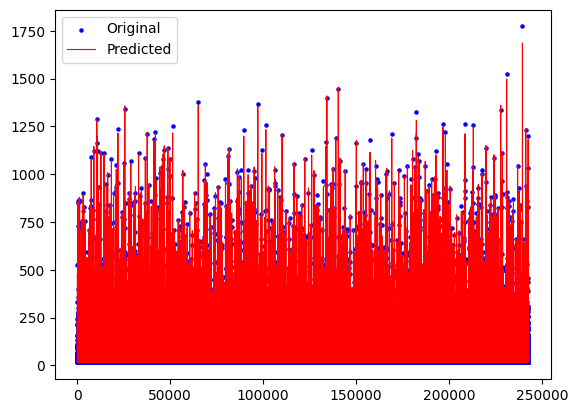

In [14]:
x_ax = range(len(y_test))

plt.scatter(x_ax, y_test, s=5, color="blue", label = "Original")

plt.plot(x_ax, y_pred, lw=0.8, color="red", label = "Predicted")

plt.legend()

plt.show()

In [0]:
from google.colab import files

files.download('RFR.pkl') 